## Proposition 2.6 (Diversification Principle) Example

We have to produce a plot in which at x-axis we have number of assets and at the y-axis we have the portfolio variance 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [21]:
# 1. Setup (mock data reflecting your example)
np.random.seed(42)
n_assets = 1000
base_vol = 0.0183  

In [22]:
# Simulate correlations: starts high, decays as we add diverse assets
corr_matrix = np.zeros((n_assets, n_assets))
for i in range(n_assets):
    for j in range(n_assets):
        corr_matrix[i,j] = 0.7 * np.exp(-0.3*abs(i-j))  # Correlation decay

np.fill_diagonal(corr_matrix, 1)

In [23]:
# 2. Compute portfolio volatility
def portfolio_vol(n, corr_matrix, base_vol):
    subset = corr_matrix[:n,:n]
    weights = np.ones(n)/n
    cov_matrix = (base_vol**2) * subset
    return np.sqrt(weights.T @ cov_matrix @ weights)

In [24]:
asset_counts = np.arange(1, n_assets+1)
empirical_vol = [portfolio_vol(n, corr_matrix, base_vol) for n in asset_counts]
theoretical_vol = base_vol / np.sqrt(asset_counts)

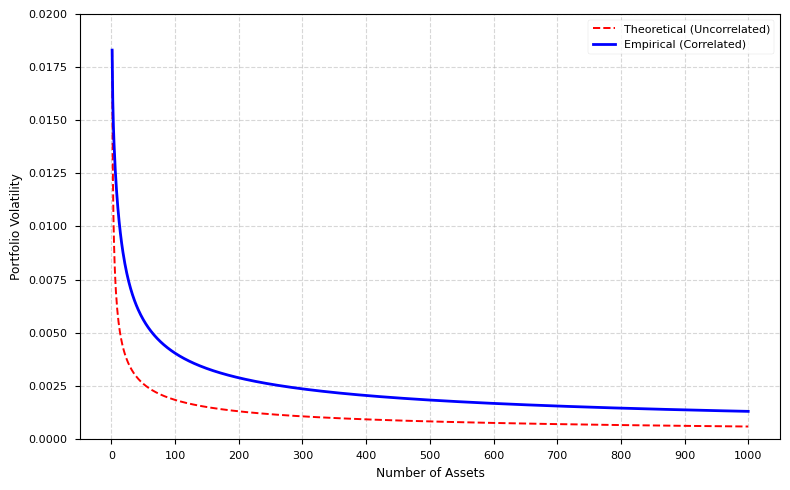

In [28]:
# 3. Plotting
plt.style.use('seaborn-v0_8-paper')  # Professional style
fig, ax = plt.subplots(figsize=(8, 5))

# Main curves
ax.plot(asset_counts, theoretical_vol, 'r--', label='Theoretical (Uncorrelated)')
ax.plot(asset_counts, empirical_vol, 'b-', lw=2, label='Empirical (Correlated)')

ax.set(xlabel='Number of Assets', 
       ylabel='Portfolio Volatility',
       xticks=np.arange(0, 1001, 100),
       ylim=(0, 0.02))

ax.grid(True, which='both', linestyle='--', alpha=0.5)
ax.legend(frameon=True, facecolor='white')


plt.tight_layout()
plt.savefig('diversification.png', dpi=300, bbox_inches='tight')
plt.show()